In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conn = sqlite3.connect('crossvalidated.db')

In [9]:
# return all the records
query = "SELECT * FROM posts"

In [5]:
post_df = pd.read_sql_query(query, conn)

In [6]:
post_df.head()

,Body,ViewCount,LastEditorDisplayName,ClosedDate,CommunityOwnedDate,LastEditorUserId,ParentID,LastEditDate,CommentCount,AnswerCount,...,Score,OwnerDisplayName,Title,PostTypeId,OwnerUserId,Tags,CreationDate,FavoriteCount,Id,LastActivityDate
0,<p>How should I elicit prior distributions fro...,1850.0,None,None,None,NaN,NaN,None,1,5.0,...,31,None,Eliciting priors from experts,1,8.0,<bayesian><prior><elicitation>,2010-07-19T19:12:12.510,19.0,1,2010-09-15T21:08:26.077
1,<p>In many different statistical methods there...,15519.0,None,None,None,88.0,NaN,2010-08-07T17:56:44.800,1,7.0,...,26,None,What is normality?,1,24.0,<distributions><normality>,2010-07-19T19:12:57.157,9.0,2,2012-11-12T09:21:54.993
2,<p>What are some valuable Statistical Analysis...,5162.0,None,None,2010-07-19T19:13:28.577,183.0,NaN,2011-02-12T05:50:03.667,4,19.0,...,63,None,What are some valuable Statistical Analysis op...,1,18.0,<software><open-source>,2010-07-19T19:13:28.577,38.0,3,2013-05-27T14:48:36.927
3,<p>I have two groups of data. Each with a dif...,15443.0,None,None,None,NaN,NaN,None,2,5.0,...,15,None,Assessing the significance of differences in d...,1,23.0,<distributions><statistical-significance>,2010-07-19T19:13:31.617,4.0,4,2010-09-08T03:00:19.690
4,"<p>The R-project</p>\n\n<p><a href=""http://www...",NaN,None,None,2010-07-19T19:14:43.050,23.0,3.0,2010-07-19T19:21:15.063,3,NaN,...,84,None,None,2,23.0,None,2010-07-19T19:14:43.050,NaN,5,2010-07-19T19:21:15.063


In [7]:
post_df.columns

Index([u'Body', u'ViewCount', u'LastEditorDisplayName', u'ClosedDate',
       u'CommunityOwnedDate', u'LastEditorUserId', u'ParentID',
       u'LastEditDate', u'CommentCount', u'AnswerCount', u'AcceptedAnswerId',
       u'Score', u'OwnerDisplayName', u'Title', u'PostTypeId', u'OwnerUserId',
       u'Tags', u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate'],
      dtype='object')

In [11]:
post_df.dtypes

Body                      object
ViewCount                float64
LastEditorDisplayName     object
ClosedDate                object
CommunityOwnedDate        object
LastEditorUserId         float64
ParentID                 float64
LastEditDate              object
CommentCount               int64
AnswerCount              float64
AcceptedAnswerId         float64
Score                      int64
OwnerDisplayName          object
Title                     object
PostTypeId                 int64
OwnerUserId              float64
Tags                      object
CreationDate              object
FavoriteCount            float64
Id                         int64
LastActivityDate          object
dtype: object

In [12]:
post_df.describe()

,ViewCount,LastEditorUserId,ParentID,CommentCount,AnswerCount,AcceptedAnswerId,Score,PostTypeId,OwnerUserId,FavoriteCount,Id
count,75067.000000,72500.000000,74331.000000,151044.000000,75067.000000,23818.000000,151044.000000,151044.000000,149271.000000,22850.000000,151044.000000
mean,816.843660,22134.436566,83680.391479,1.922029,0.990195,90904.345117,2.736117,1.530408,31738.179479,2.731116,98085.845171
std,4281.584173,25574.054081,59199.273110,2.662302,1.336717,58499.459081,5.921776,0.590355,29888.893801,7.726070,59672.239119
min,2.000000,-1.000000,1.000000,0.000000,0.000000,5.000000,-35.000000,1.000000,-1.000000,0.000000,1.000000
25%,46.000000,2116.000000,29330.500000,0.000000,0.000000,37654.750000,0.000000,1.000000,6553.000000,1.000000,45750.750000
50%,118.000000,11032.000000,76590.000000,1.000000,1.000000,86705.500000,1.000000,2.000000,22452.000000,1.000000,95794.500000
75%,404.000000,31379.000000,134031.500000,3.000000,1.000000,141417.250000,3.000000,2.000000,52615.000000,2.000000,151788.250000
max,293679.000000,107565.000000,200147.000000,45.000000,143.000000,200143.000000,334.000000,7.000000,107587.000000,389.000000,200182.000000


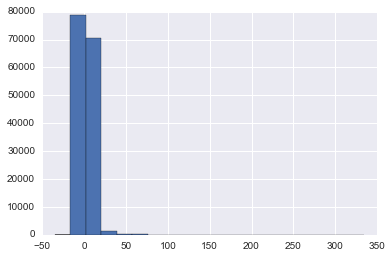

In [19]:
post_df['Score'].hist(bins=20)

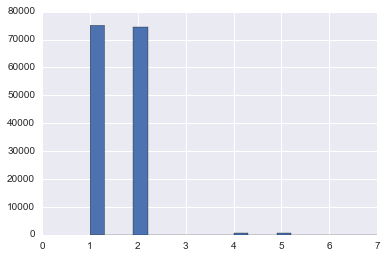

In [20]:
post_df['PostTypeId'].hist(bins=20)